This notebook is meant to analyze the many-dimensional datasets from `../data/data_18D.txt` amd `../data/rp.data`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing my classes
from kmeans import KMeans, KMeansPP, find_k
from hierarchical import Hierarchical
from spectral import Spectral
from common import *

In [4]:
# data = pd.read_csv('../data/rp.data', header=None, sep=4*' ').values
data = pd.read_csv('../data/data_18D.txt', header=None, sep='\t').values


# save and drop last column - only for rp.data
# data_values = data[:, -1]
# data = data[:, :-1]

# print(data)

# normalize data
new_data = np.zeros(data.shape)
for i in range(data.shape[1]):
   new_data[:, i] = (data[:, i] - np.min(data[:, i])) / (np.max(data[:, i]) - np.min(data[:, i]))
   
data = new_data

# print(data)


In [5]:
# get clusterings
data_k = 2

kmeans = KMeans(data_k, 'euclidean')

kmeanspp = KMeansPP(data_k, 'euclidean')

hierarchical = Hierarchical(data_k, 'manhattan', 'ward')

spectral = Spectral(data_k, 'euclidean')

In [6]:

kmeans.fit(data)

kmeanspp.fit(data)

hierarchical.fit(data)

spectral.fit(data)

800 clusters left
700 clusters left
600 clusters left
500 clusters left
400 clusters left
300 clusters left
200 clusters left
100 clusters left


In [7]:
# get 2d projections

tsne_2d = TSNE(data, 2)
pca_2d = PCA(data, 2)

mds_2d = MDS(data, 2)
isomap_2d = Isomap(data, 2)

In [8]:
# # visualize ground truth (if available)

# fig, axs = plt.subplots(2, 2)
# plt.suptitle("Ground truth")
# axs[0, 0].scatter(tsne_2d[:,0], tsne_2d[:,1], c=data_values)
# axs[0, 0].set_title("TSNE")
# axs[0, 1].scatter(pca_2d[:,0], pca_2d[:,1], c=data_values)
# axs[0, 1].set_title("PCA")
# axs[1, 0].scatter(mds_2d[:,0], mds_2d[:,1], c=data_values)
# axs[1, 0].set_title("MDS")
# axs[1, 1].scatter(isomap_2d[:,0], isomap_2d[:,1], c=data_values)
# axs[1, 1].set_title("Isomap")

# plt.show()

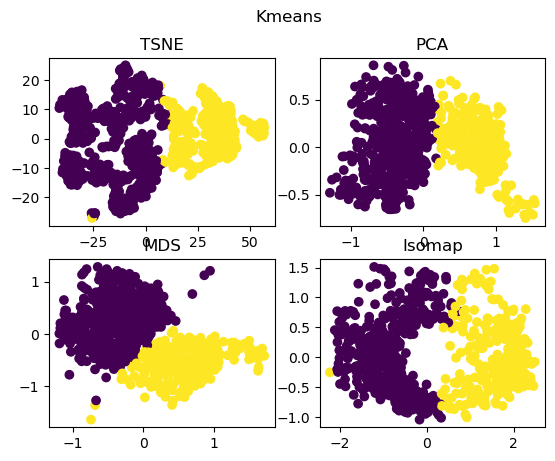

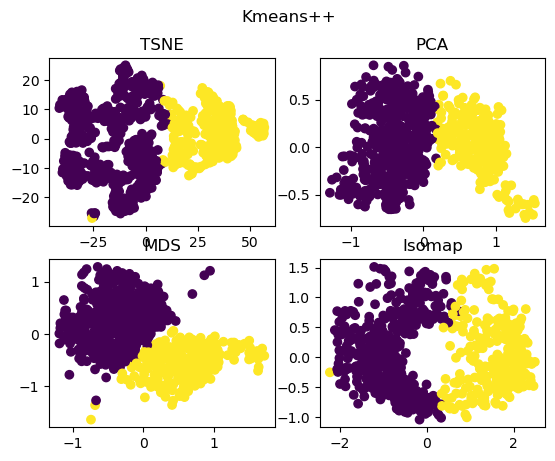

In [9]:
# visualize hierarchical with all 4 methods on one plot

fig, axs = plt.subplots(2, 2)
plt.suptitle("Kmeans")
axs[0, 0].scatter(tsne_2d[:,0], tsne_2d[:,1], c=kmeans.labels)
axs[0, 0].set_title("TSNE")
axs[0, 1].scatter(pca_2d[:,0], pca_2d[:,1], c=kmeans.labels)
axs[0, 1].set_title("PCA")
axs[1, 0].scatter(mds_2d[:,0], mds_2d[:,1], c=kmeans.labels)
axs[1, 0].set_title("MDS")
axs[1, 1].scatter(isomap_2d[:,0], isomap_2d[:,1], c=kmeans.labels)
axs[1, 1].set_title("Isomap")

plt.show()

fig, axs = plt.subplots(2, 2)
plt.suptitle("Kmeans++")
axs[0, 0].scatter(tsne_2d[:,0], tsne_2d[:,1], c=kmeanspp.labels)
axs[0, 0].set_title("TSNE")
axs[0, 1].scatter(pca_2d[:,0], pca_2d[:,1], c=kmeanspp.labels)
axs[0, 1].set_title("PCA")
axs[1, 0].scatter(mds_2d[:,0], mds_2d[:,1], c=kmeanspp.labels)
axs[1, 0].set_title("MDS")
axs[1, 1].scatter(isomap_2d[:,0], isomap_2d[:,1], c=kmeanspp.labels)
axs[1, 1].set_title("Isomap")

plt.show()

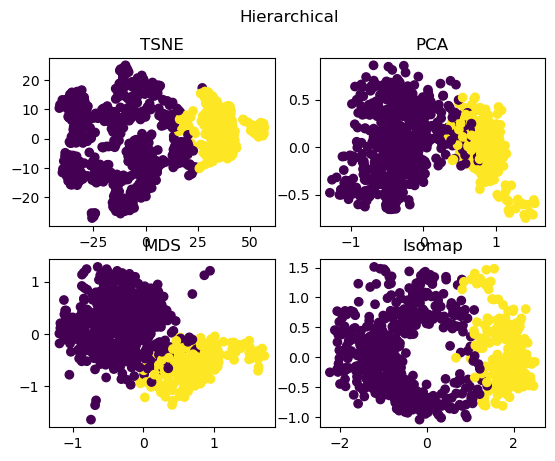

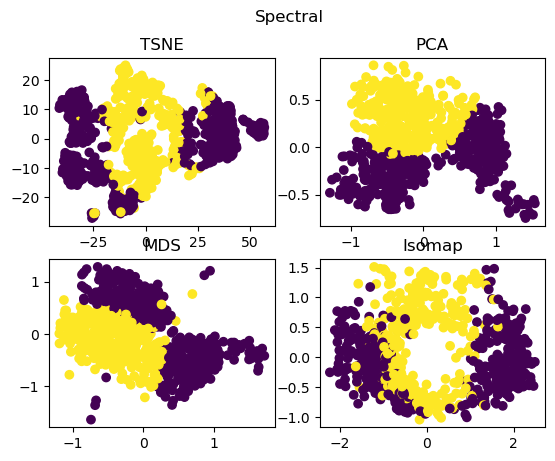

In [10]:

fig, axs = plt.subplots(2, 2)
plt.suptitle("Hierarchical")
axs[0, 0].scatter(tsne_2d[:,0], tsne_2d[:,1], c=hierarchical.labels)
axs[0, 0].set_title("TSNE")
axs[0, 1].scatter(pca_2d[:,0], pca_2d[:,1], c=hierarchical.labels)
axs[0, 1].set_title("PCA")
axs[1, 0].scatter(mds_2d[:,0], mds_2d[:,1], c=hierarchical.labels)
axs[1, 0].set_title("MDS")
axs[1, 1].scatter(isomap_2d[:,0], isomap_2d[:,1], c=hierarchical.labels)
axs[1, 1].set_title("Isomap")

plt.show()

fig, axs = plt.subplots(2, 2)
plt.suptitle("Spectral")
axs[0, 0].scatter(tsne_2d[:,0], tsne_2d[:,1], c=spectral.labels)
axs[0, 0].set_title("TSNE")
axs[0, 1].scatter(pca_2d[:,0], pca_2d[:,1], c=spectral.labels)
axs[0, 1].set_title("PCA")
axs[1, 0].scatter(mds_2d[:,0], mds_2d[:,1], c=spectral.labels)
axs[1, 0].set_title("MDS")
axs[1, 1].scatter(isomap_2d[:,0], isomap_2d[:,1], c=spectral.labels)
axs[1, 1].set_title("Isomap")

plt.show()

In [11]:
# # compare clusterings with true labels using my function (for dataset rp.data)

# print("KMeans:", compare_clustering(data_values, kmeans.labels))

# print("KMeans++:", compare_clustering(data_values, kmeanspp.labels))

# print("Hierarchical:", compare_clustering(data_values, hierarchical.labels))

# print("Spectral:", compare_clustering(data_values, spectral.labels))

# # compare clusterings with true labels using sklearn
# from sklearn.metrics import normalized_mutual_info_score

# print("metric we do not believe at all:")

# print("KMeans:", normalized_mutual_info_score(data_values, kmeans.labels))

# print("KMeans++:", normalized_mutual_info_score(data_values, kmeanspp.labels))

# print("Hierarchical:", normalized_mutual_info_score(data_values, hierarchical.labels))

# print("Spectral:", normalized_mutual_info_score(data_values, spectral.labels))

ValueError: x and y must have same first dimension, but have shapes (49,) and (51,)

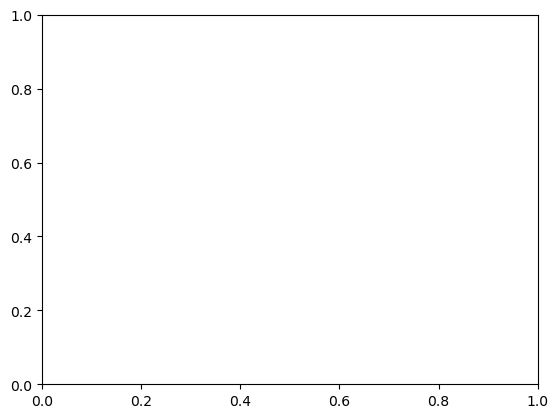

In [12]:
# for non normalized data
data = pd.read_csv('../data/data_18D.txt', header=None, sep='\t').values

print(find_k(data, 50, 1))

# normalize data

new_data = np.zeros(data.shape)

for i in range(data.shape[1]):
    new_data[:, i] = (data[:, i] - np.min(data[:, i])) / (np.max(data[:, i]) - np.min(data[:, i]))

data = new_data

print(find_k(data, 50,1))